<a href="https://colab.research.google.com/github/Rajshree04/Brand_Perception_Analysis/blob/main/Brand_Perception_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from textblob import TextBlob
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df = pd.read_csv("youtube_comments.csv")
df.head(5)

,comment,replies,date,user_name
0,this season feels underrated,[],2023-03-18T09:38:36Z,@shezstar
1,i dont like to invest in netflix \nbut i love ...,[],2021-12-27T10:27:22Z,@shuraifyt1183
2,best of best all time!!!,[],2021-09-20T10:39:22Z,@a2zringt0nes33
3,i those person who is watching this trailer af...,[],2021-07-13T12:27:59Z,@samratdbc4446
4,"Netflix- ""lets stream this. What will be the n...",[],2021-05-09T11:02:24Z,@sonder_.


In [ ]:
df_replies = df['replies']
df_replies.info()

<class 'pandas.core.series.Series'>
RangeIndex: 973 entries, 0 to 972
Series name: replies
Non-Null Count  Dtype 
--------------  ----- 
886 non-null    object
dtypes: object(1)
memory usage: 7.7+ KB


In [ ]:
df.drop(['date','user_name','replies'],axis=1,inplace=True)
df.head()

,comment
0,this season feels underrated
1,i dont like to invest in netflix \nbut i love ...
2,best of best all time!!!
3,i those person who is watching this trailer af...
4,"Netflix- ""lets stream this. What will be the n..."


In [ ]:
df_filtered = df_replies[df_replies != '[]']
print(df_filtered)
df_filtered.shape

19     ['its a teaser dude money heist s4 trailer has...
28     ['For real and we need a season where the cops...
49           ['For Nairobi', 'Check Mate', 'Check Mate']
52     ['Irene S no , just some boring conversations ...
85                                   ['Same brother 🤪🤪']
                             ...                        
968                                                  NaN
969                                                  NaN
970                                                  NaN
971                                                  NaN
972                                                  NaN
Name: replies, Length: 168, dtype: object


(168,)

In [ ]:
series_df = df_filtered.to_frame(name=df.columns[0])

In [ ]:
import re
series_df = series_df.replace(r"^\['|'|\]|'\]$", '', regex=True)

In [ ]:
series_df

,comment
19,its a teaser dude money heist s4 trailer has a...
28,For real and we need a season where the cops wins
49,"For Nairobi, Check Mate, Check Mate"
52,"Irene S no , just some boring conversations , ..."
85,Same brother 🤪🤪
...,...
968,NaN
969,NaN
970,NaN
971,NaN


In [ ]:
df = pd.concat([df, series_df], axis=0, ignore_index=True)

In [ ]:
null_count = df['comment'].isnull().sum()

print(f'The number of null values in the column is: {null_count}')

The number of null values in the column is: 87


In [ ]:
# Remove rows with null values and modify the original DataFrame
df.dropna(inplace=True)

# Check for any remaining null values
null_count_after_removal = df['comment'].isnull().sum()

print("DataFrame after removing null values:")
print(df)

print(f'The number of null values in the column after removal is: {null_count_after_removal}')

DataFrame after removing null values:
                                                comment
0                          this season feels underrated
1     i dont like to invest in netflix \nbut i love ...
2                              best of best all time!!!
3     i those person who is watching this trailer af...
4     Netflix- "lets stream this. What will be the n...
...                                                 ...
1049                         23:20 subscribe for me 🙏❤️
1050                Sudharsan Hari subscribe for me 🙏❤️
1051                fastlane gamer subscribe for me 🙏❤️
1052  Thank god she is but i dont think she is still...
1053                Jaden Oguimas 👌🏽, Yeah me toooooo🔥🔥

[1054 rows x 1 columns]
The number of null values in the column after removal is: 0


In [ ]:
df.shape

(1054, 1)

In [ ]:
#convert to lower case
df['comment'] = df['comment'].str.lower()

In [ ]:
# removing punctuation
import string
exclude = string.punctuation
exclude

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
def remove_punctuation(text):
    return text.translate(str.maketrans('','',exclude))

df['comment'] = df['comment'].apply(remove_punctuation)
df['comment']

0                            this season feels underrated
1       i dont like to invest in netflix \nbut i love ...
2                                   best of best all time
3       i those person who is watching this trailer af...
4       netflix lets stream this what will be the name...
                              ...                        
1049                            2320 subscribe for me 🙏❤️
1050                  sudharsan hari subscribe for me 🙏❤️
1051                  fastlane gamer subscribe for me 🙏❤️
1052    thank god she is but i dont think she is still...
1053                   jaden oguimas 👌🏽 yeah me toooooo🔥🔥
Name: comment, Length: 1054, dtype: object

In [ ]:
def correct_spelling(comment):
    textblb = TextBlob(comment)
    return textblb.correct().string

# Apply the function to each comment
df['comment'] = df['comment'].apply(correct_spelling)

In [ ]:
!pip install emoji
import emoji
import re

def convert_emojis_to_text(text):
    # Convert emojis to text using the demojize function
    text_with_emojis = emoji.demojize(text, delimiters=(" ", " "))

    # Remove colons and replace underscores with spaces
    text_with_emojis = re.sub(r':', '', text_with_emojis)
    text_with_emojis = re.sub(r'_', ' ', text_with_emojis)

    return text_with_emojis

df['comment'] = df["comment"].apply(convert_emojis_to_text)

In [ ]:
from nltk.tokenize import word_tokenize

# Tokenize the comments
df['comment'] = df['comment'].apply(word_tokenize)

In [ ]:
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Remove stop words from tokenized comments
df['comment'] = df['comment'].apply(lambda x: [word for word in x if word not in stop_words])

# Display the DataFrame with tokenized comments without stop words
print(df.head(5))

                                             comment
0                        [season, feels, underrated]
1  [dont, like, invest, netflix, love, series, pr...
2                                 [best, best, time]
3  [person, watching, trailer, watch, full, serie...
4  [netflix, lets, stream, name, someone, mmm, mo...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from nltk.stem import WordNetLemmatizer

# Download WordNet data for lemmatization
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

# Lemmatize the tokenized comments
df['lemmatized_comment'] = df['comment'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

df.head(5)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,comment,lemmatized_comment
0,"[season, feels, underrated]","[season, feel, underrated]"
1,"[dont, like, invest, netflix, love, series, pr...","[dont, like, invest, netflix, love, series, pr..."
2,"[best, best, time]","[best, best, time]"
3,"[person, watching, trailer, watch, full, serie...","[person, watching, trailer, watch, full, serie..."
4,"[netflix, lets, stream, name, someone, mmm, mo...","[netflix, let, stream, name, someone, mmm, mon..."


In [ ]:
# Join the lists of lemmatized words into single strings
df['lemmatized_comment'] = df['lemmatized_comment'].apply(lambda x: ' '.join(x))
df.head(5)

,comment,lemmatized_comment
0,"[season, feels, underrated]",season feel underrated
1,"[dont, like, invest, netflix, love, series, pr...",dont like invest netflix love series professor...
2,"[best, best, time]",best best time
3,"[person, watching, trailer, watch, full, serie...",person watching trailer watch full series face...
4,"[netflix, lets, stream, name, someone, mmm, mo...",netflix let stream name someone mmm money some...


In [ ]:
!pip install vaderSentiment
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

def get_sentiment(comment):
    score = sia.polarity_scores(comment)
    if score['compound'] >= 0.03:
        return 'positive'
    elif score['compound'] <= -0.03:
        return 'negative'
    else:
        return 'neutral'

# Apply the get_sentiment function to each comment in the DataFrame
df['sentiment'] = df['lemmatized_comment'].apply(get_sentiment)
df.head(5)

,comment,lemmatized_comment,sentiment
0,"[season, feels, underrated]",season feel underrated,neutral
1,"[dont, like, invest, netflix, love, series, pr...",dont like invest netflix love series professor...,positive
2,"[best, best, time]",best best time,positive
3,"[person, watching, trailer, watch, full, serie...",person watching trailer watch full series face...,neutral
4,"[netflix, lets, stream, name, someone, mmm, mo...",netflix let stream name someone mmm money some...,neutral


<ipython-input-86-b452e247d86b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentiment', y='Count', data=sentiment_counts_df, palette='viridis')


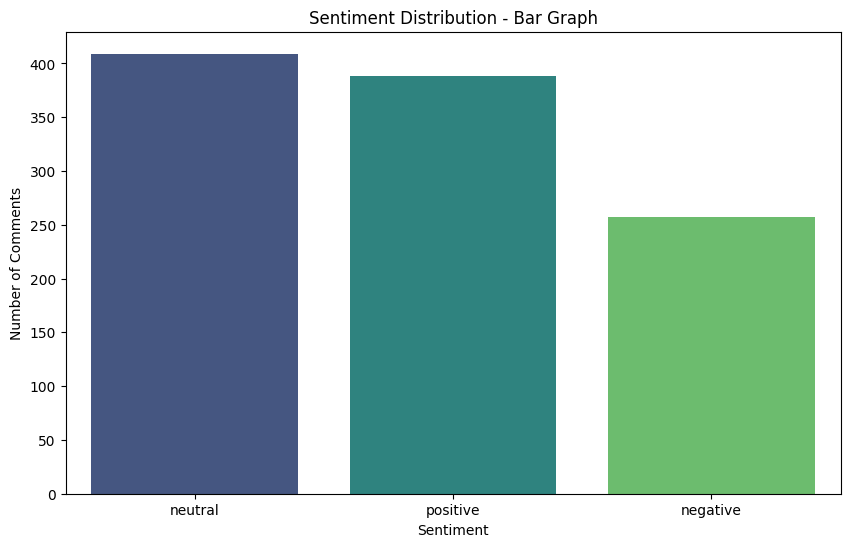

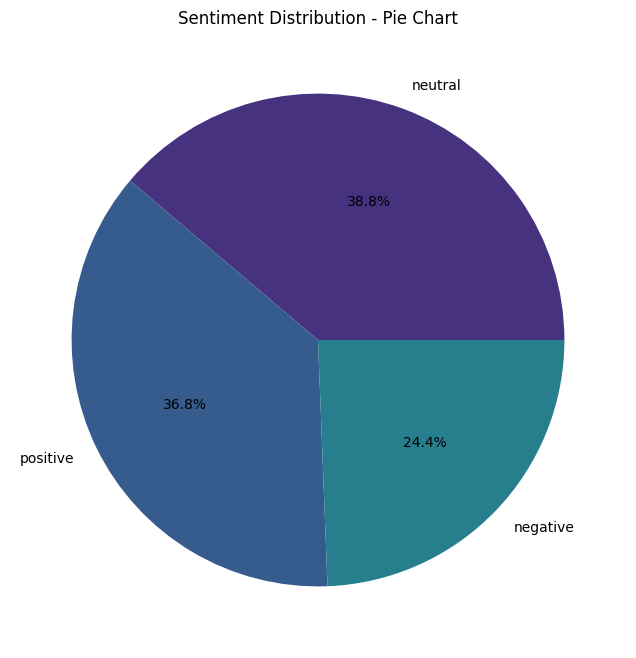

In [ ]:
import seaborn as sns

# Count the number of positive, negative, and neutral comments
sentiment_counts = df['sentiment'].value_counts()

# Convert sentiment_counts to a DataFrame for easier plotting
sentiment_counts_df = sentiment_counts.reset_index()
sentiment_counts_df.columns = ['Sentiment', 'Count']

# Plot a bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='Sentiment', y='Count', data=sentiment_counts_df, palette='viridis')
plt.title('Sentiment Distribution - Bar Graph')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'))
plt.title('Sentiment Distribution - Pie Chart')
plt.show()


In [ ]:
print(df['sentiment'].value_counts())

sentiment
neutral     409
positive    388
negative    257
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['sentiment'] = label_encoder.fit_transform(df['sentiment'])

In [ ]:
print(df['sentiment'].value_counts())

sentiment
1    409
2    388
0    257
Name: count, dtype: int64


In [ ]:
X = df.drop(['sentiment','comment'], axis=1)
y = df['sentiment']

In [ ]:
X

,lemmatized_comment
0,season feel underrated
1,dont like invest netflix love series professor...
2,best best time
3,person watching trailer watch full series face...
4,netflix let stream name someone mmm money some...
...,...
1049,2320 subscribe folded hand red heart
1050,sudharsan hair subscribe folded hand red heart
1051,fastlane game subscribe folded hand red heart
1052,thank god dont think still bank nairobi dy rio...


In [ ]:
y

0       1
1       2
2       2
3       1
4       1
       ..
1049    2
1050    2
1051    2
1052    2
1053    2
Name: sentiment, Length: 1054, dtype: int64

In [ ]:
# WITH SAMPLING

In [ ]:
majority_class_count = y.value_counts().max()
majority_class_count

409

In [ ]:
sampling_strategy = {
    2: majority_class_count,
    0: majority_class_count
}

In [ ]:
import sklearn
print(sklearn.__version__)

1.5.0


In [ ]:
import imblearn

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [ ]:
# Create a new DataFrame with the resampled data
df1 = pd.concat([X_resampled, y_resampled], axis=1)

In [ ]:
print("\nResampled DataFrame")
print(df1['sentiment'].value_counts())


Resampled DataFrame
sentiment
1    409
2    409
0    409
Name: count, dtype: int64


In [ ]:
# Check for missing values
missing_values = df1.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Check the number of rows with any missing values
rows_with_missing_values = df1.isnull().any(axis=1).sum()
print(f"Number of rows with missing values: {rows_with_missing_values}")

Missing values in each column:
lemmatized_comment    0
sentiment             0
dtype: int64
Number of rows with missing values: 0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = df1['lemmatized_comment']
y = df1['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(X_train_tfidf)

  (0, 1113)	0.4400604308680948
  (0, 944)	0.1944597965468688
  (0, 835)	0.348086542718535
  (0, 1087)	0.4400604308680948
  (0, 901)	0.348086542718535
  (0, 424)	0.37288061420821955
  (0, 1254)	0.3091960176564246
  (0, 1394)	0.3129031953575224
  (1, 670)	0.12361613564543764
  (1, 185)	0.37084840693631294
  (1, 1369)	0.09100075265720951
  (1, 886)	0.13099681369761426
  (1, 913)	0.12361613564543764
  (1, 1535)	0.19993059618852066
  (1, 531)	0.1730775811102332
  (1, 1207)	0.12361613564543764
  (1, 837)	0.07788465688575644
  (1, 1261)	0.13099681369761426
  (1, 465)	0.11837946122958848
  (1, 379)	0.13099681369761426
  (1, 633)	0.09314475629353695
  (1, 1375)	0.13099681369761426
  (1, 153)	0.12361613564543764
  (1, 544)	0.12361613564543764
  (1, 549)	0.13099681369761426
  :	:
  (973, 1215)	0.584188488174801
  (974, 1027)	0.2839089521742575
  (974, 467)	0.37232506011950706
  (974, 587)	0.4541460088291681
  (974, 1185)	0.5359669575388291
  (974, 731)	0.5359669575388291
  (975, 385)	0.3254152189

In [ ]:
import pickle
pickle.dump(tfidf_vectorizer,open('tfidf_model.pkl','wb'))

In [ ]:
from google.colab import files
file_path = "/content/tfidf_model.pkl"
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Scale the training data
X_train_scaled = scaler.fit_transform(X_train_tfidf.toarray())

# Scale the test data
X_test_scaled = scaler.transform(X_test_tfidf.toarray())

In [ ]:
pickle.dump(scaler,open('minmax_model.pkl','wb'))

In [ ]:
file_path = "/content/minmax_model.pkl"
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Predict on the test data
y_pred = dt_classifier.predict(X_test_scaled)
# Print the classification report and accuracy
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87        87
           1       0.78      0.92      0.84        76
           2       0.90      0.77      0.83        83

    accuracy                           0.85       246
   macro avg       0.85      0.85      0.85       246
weighted avg       0.86      0.85      0.85       246

Accuracy: 0.8495934959349594


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

# Assuming X_train_tfidf and ytrain are already defined and preprocessed
# Define the RandomForestClassifier with n_estimators set to 300
rf_classifier = RandomForestClassifier(n_estimators=300, random_state=42)

# Fit the classifier on the training data
rf_classifier.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Calculate and print the accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.8699186991869918


In [ ]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(rf_classifier, X_train_tfidf, y_train, cv=6, scoring="accuracy")
print("Accuracy: ", acc)
print("Accuracy: ", acc.mean())

Accuracy:  [0.79268293 0.81707317 0.82317073 0.87116564 0.82822086 0.86503067]
Accuracy:  0.8328906678637339


<Axes: >

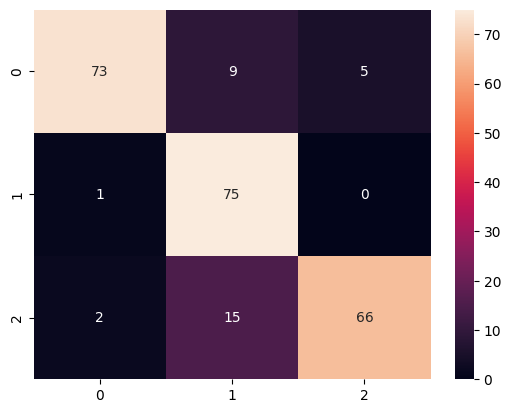

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_test,y_pred_rf )
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train_tfidf, y_train)
y_pred_gb = gb_classifier.predict(X_test_tfidf)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.8292682926829268


In [ ]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)
y_pred_svm = svm_classifier.predict(X_test_tfidf)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM Accuracy: 0.8699186991869918


In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
import numpy as np

# Initialize classifiers
rf_classifier = RandomForestClassifier(random_state=42)
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier(random_state=42)

# Define the hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Define the hyperparameter grid for SVC
svc_param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Define the hyperparameter grid for Decision Tree
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Perform GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train_tfidf, y_train)
print("Best parameters for Random Forest:", rf_grid_search.best_params_)

# Perform GridSearchCV for SVC
svc_grid_search = GridSearchCV(svc_classifier, svc_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svc_grid_search.fit(X_train_tfidf, y_train)
print("Best parameters for SVC:", svc_grid_search.best_params_)

# Perform GridSearchCV for Decision Tree
dt_grid_search = GridSearchCV(dt_classifier, dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid_search.fit(X_train_tfidf, y_train)
print("Best parameters for Decision Tree:", dt_grid_search.best_params_)

# Get the best models
best_rf = rf_grid_search.best_estimator_
best_svc = svc_grid_search.best_estimator_
best_dt = dt_grid_search.best_estimator_

# Create an ensemble using VotingClassifier
ensemble_classifier = VotingClassifier(estimators=[
    ('random_forest', best_rf),
    ('svc', best_svc),
    ('decision_tree', best_dt)
], voting='hard')

# Cross-validation on the ensemble model
cv_scores = cross_val_score(ensemble_classifier, X_train_tfidf, y_train, cv=5, scoring='accuracy')

# Print cross-validation scores and the mean accuracy
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {np.mean(cv_scores):.4f}')

# Train the ensemble classifier
ensemble_classifier.fit(X_train_tfidf, y_train)

# Make predictions with the ensemble classifier
ensemble_predictions = ensemble_classifier.predict(X_test_tfidf)

# Calculate accuracy score
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print(f'Ensemble Accuracy: {ensemble_accuracy:.4f}')

# Print classification report
print("Ensemble Classification Report:")
print(classification_report(y_test, ensemble_predictions))


In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
import numpy as np

# Define the best estimators with the best parameters
best_rf = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)
best_svc = SVC(C=10, gamma='scale', random_state=42)
best_dt = DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Create an ensemble using VotingClassifier
ensemble_model = VotingClassifier(estimators=[
    ('random_forest', best_rf),
    ('svc', best_svc),
    ('decision_tree', best_dt)
], voting='hard')

# Cross-validation on the ensemble model
cv_scores = cross_val_score(ensemble_model, X_train_tfidf, y_train, cv=5, scoring='accuracy')
# Print cross-validation scores and the mean accuracy
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean Cross-Validation Accuracy: {np.mean(cv_scores):.4f}')

# Train the ensemble classifier
ensemble_model.fit(X_train_tfidf, y_train)

# Make predictions with the ensemble classifier
ensemble_predictions = ensemble_model.predict(X_test_tfidf)

# Calculate accuracy score
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print(f'Ensemble Accuracy: {ensemble_accuracy:.4f}')

# Print classification report
print("Ensemble Classification Report:")
print(classification_report(y_test, ensemble_predictions))

Cross-Validation Scores: [0.78172589 0.82653061 0.87755102 0.80612245 0.8622449 ]
Mean Cross-Validation Accuracy: 0.8308
Ensemble Accuracy: 0.8780
Ensemble Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.86      0.89        87
           1       0.78      0.96      0.86        76
           2       0.94      0.82      0.88        83

    accuracy                           0.88       246
   macro avg       0.89      0.88      0.88       246
weighted avg       0.89      0.88      0.88       246



In [ ]:
pickle.dump(ensemble_model,open('final_model.pkl','wb'))

In [ ]:
file_path = "/content/final_model.pkl"
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>